In [ ]:
 import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving nike dataset.csv to nike dataset.csv


In [ ]:
df = pd.read_csv('nike dataset.csv')

In [ ]:
df.head()

,Reviewer,Title,Content,Star_rating,Rating,Date,Reviews_posted,Location
0,Lisa Stammer,Easy website,"Easy website, fast shipping, wonderful custom...",4,Great,2020-12-29,5,United States
1,sharon richards,Hey Merry Christmas Nike!!,Hey Merry Christmas Nike!!Delivery scheduled f...,1,Bad,2020-12-23,2,United Kingdom
2,jason,Nike along with apple and coca cola supporting...,"""I read in the New York Times that Nike is fig...",1,Bad,2020-12-22,3,United States
3,Ted Hollar,Ordered some shoes the 16th SAME day I…,Ordered some shoes the 16th SAME day I ordered...,1,Bad,2020-12-22,2,United States
4,Charles Nelson,bad service but good product,NaN,1,Bad,2020-12-21,1,United Kingdom


In [ ]:
df.shape

(236, 8)

In [ ]:
df.isnull().sum()

,0
Reviewer,0
Title,0
Content,42
Star_rating,0
Rating,0
Date,0
Reviews_posted,0
Location,0


In [ ]:

categorical = [var for var in df.columns if df[var].dtype=='O']

print(format(len(categorical)))

print('The categorical variables are :', categorical)

5
The categorical variables are : ['Reviewer', 'Title', 'Content', 'Date', 'Location']


In [ ]:


df[categorical].head()

,Reviewer,Title,Content,Date,Location
0,Lisa Stammer,Easy website,"Easy website, fast shipping, wonderful custom...",2020-12-29,United States
1,sharon richards,Hey Merry Christmas Nike!!,Hey Merry Christmas Nike!!Delivery scheduled f...,2020-12-23,United Kingdom
2,jason,Nike along with apple and coca cola supporting...,"""I read in the New York Times that Nike is fig...",2020-12-22,United States
3,Ted Hollar,Ordered some shoes the 16th SAME day I…,Ordered some shoes the 16th SAME day I ordered...,2020-12-22,United States
4,Charles Nelson,bad service but good product,No content provided,2020-12-21,United Kingdom


In [ ]:
print(df['Content'].isnull().sum())
df['Content'] = df['Content'].fillna('No content provided')
print(df['Content'].isnull().sum())

42
0


In [ ]:

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 234
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Reviewer           214 non-null    object 
 1   Title              214 non-null    object 
 2   Content            214 non-null    object 
 3   Star_rating        214 non-null    int64  
 4   Date               214 non-null    object 
 5   Reviews_posted     214 non-null    int64  
 6   Location           214 non-null    object 
 7   Rating_ Average    214 non-null    float64
 8   Rating_ Excellent  214 non-null    float64
 9   Rating_ Great      214 non-null    float64
 10  Rating_ Poor       214 non-null    float64
 11  Rating_Bad         214 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 21.7+ KB


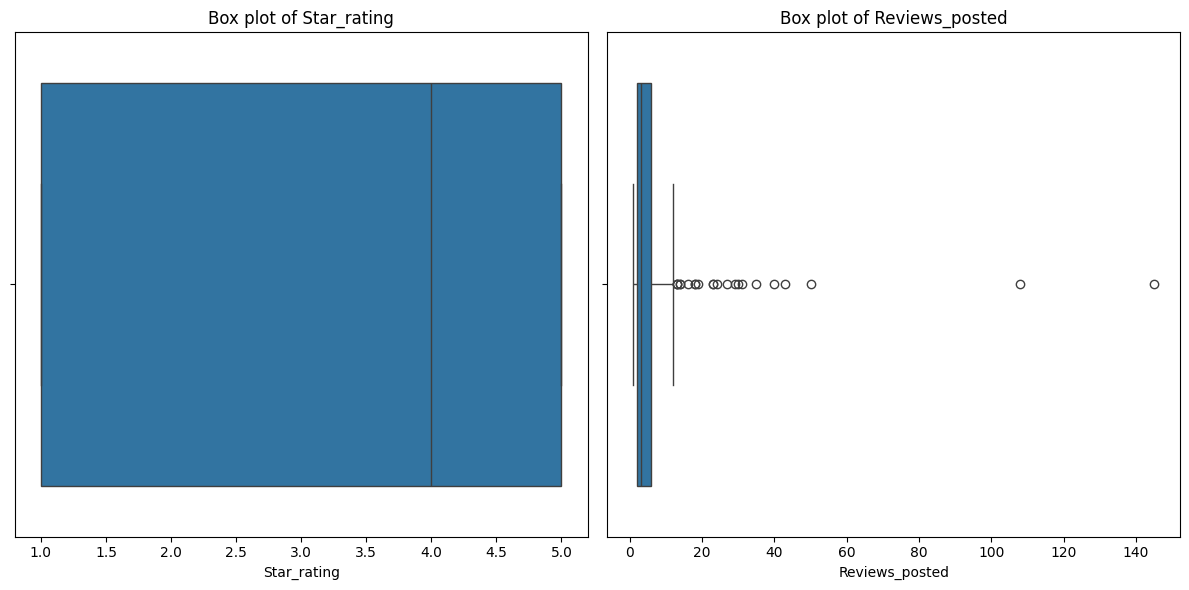

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Star_rating'])
plt.title('Box plot of Star_rating')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Reviews_posted'])
plt.title('Box plot of Reviews_posted')

plt.tight_layout()
plt.show()

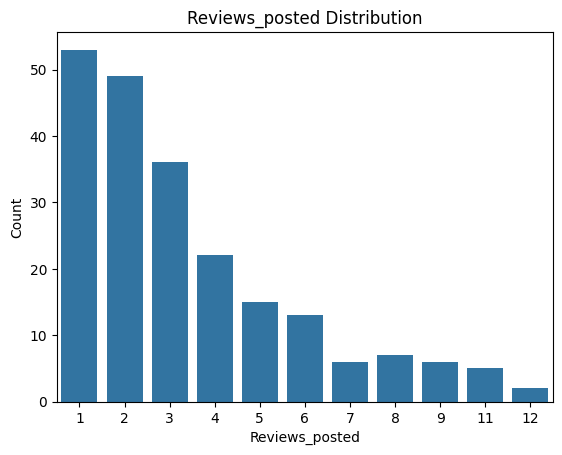

In [ ]:
import seaborn as sns
sns.countplot(x='Reviews_posted', data=df)
plt.title('Reviews_posted Distribution')
plt.xlabel('Reviews_posted')
plt.ylabel('Count')
plt.show()

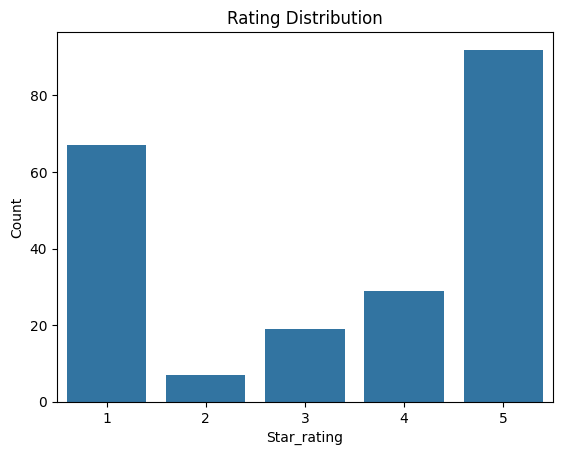

In [ ]:
sns.countplot(x='Star_rating', data=df)
plt.title('Rating Distribution')
plt.xlabel('Star_rating')
plt.ylabel('Count')
plt.show()

In [ ]:
y = df['Star_rating']
X_simple = df[['Reviews_posted']]
X_multiple = df[['Reviews_posted', 'Rating_ Average', 'Rating_ Excellent', 'Rating_ Great', 'Rating_ Poor', 'Rating_Bad']]

In [ ]:
from sklearn.model_selection import train_test_split

X_simple_train, X_simple_test, y_simple_train, y_simple_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_multiple_train, X_multiple_test, y_multiple_train, y_multiple_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

simple_model = LinearRegression()
simple_model.fit(X_simple_train, y_simple_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression

multiple_model = LinearRegression()
multiple_model.fit(X_multiple_train, y_multiple_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

simple_predictions = simple_model.predict(X_simple_test)
simple_mse = mean_squared_error(y_simple_test, simple_predictions)
simple_r2 = r2_score(y_simple_test, simple_predictions)
simple_rmse = np.sqrt(simple_mse)

multiple_predictions = multiple_model.predict(X_multiple_test)
multiple_mse = mean_squared_error(y_multiple_test, multiple_predictions)
multiple_r2 = r2_score(y_multiple_test, multiple_predictions)
multiple_rmse = np.sqrt(multiple_mse)

print("Simple Linear Regression Metrics:")
print(f"  MSE: {simple_mse:.4f}")
print(f"  RMSE: {simple_rmse:.4f}")
print(f"  R-squared: {simple_r2:.4f}")
print("\nMultiple Linear Regression Metrics:")
print(f"  MSE: {multiple_mse:.4f}")
print(f"  RMSE: {multiple_rmse:.4f}")
print(f"  R-squared: {multiple_r2:.4f}")

Simple Linear Regression Metrics:
  MSE: 2.8716
  RMSE: 1.6946
  R-squared: -0.0731

Multiple Linear Regression Metrics:
  MSE: 0.0000
  RMSE: 0.0000
  R-squared: 1.0000



***BINOMIAL***

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Invistico_Airline.csv to Invistico_Airline.csv


In [ ]:
df = pd.read_csv('Invistico_Airline.csv')

In [ ]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
df.dtypes

,0
satisfaction,object
Gender,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64


In [ ]:
df1 = df.dropna(axis=0).reset_index(drop = True)

In [ ]:
X= df1[["Inflight entertainment"]]
Y = df1[["satisfaction"]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
df1.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df1 = df1.astype({"Inflight entertainment":float})

In [ ]:
df1['satisfaction']=OneHotEncoder(drop="first").fit_transform(df1[['satisfaction']]).toarray()

In [ ]:
df1.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics




In [ ]:
clf = LogisticRegression().fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X= df1[["Inflight entertainment"]]
Y = df1[["satisfaction"]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
clf = LogisticRegression().fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: xlabel='Inflight entertainment', ylabel='satisfaction'>

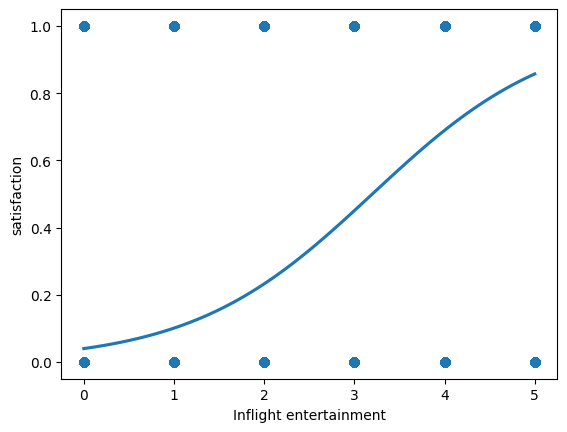

In [ ]:
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df1, logistic=True, ci=None)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy %.4f"%metrics.accuracy_score(Y_test,y_pred))
print("Precision",metrics.precision_score(Y_test,y_pred))
print("Recall", metrics.recall_score(Y_test,y_pred))

Accuracy 0.8015
Precision 0.8161420273561926
Recall 0.8215296114673708


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[13714  3925]
 [ 3785 17423]]

True Positives(TP) =  13714

True Negatives(TN) =  17423

False Positives(FP) =  3925

False Negatives(FN) =  3785


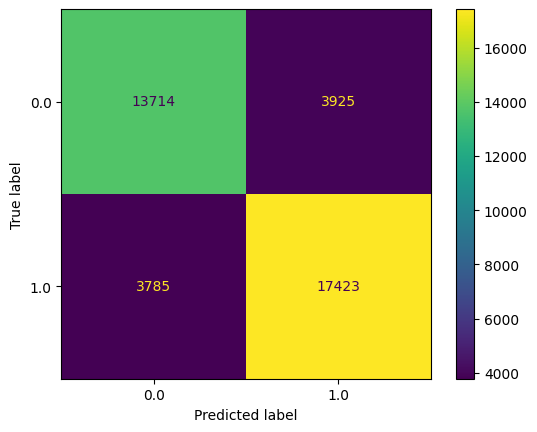

In [ ]:
cm = metrics.confusion_matrix(Y_test,y_pred, labels=clf.classes_)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
display.plot()

**ORDINAL**











In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


In [ ]:
df = pd.read_csv('Titanic.csv')

In [ ]:
Y = df['Survived']
X = df.drop('Survived', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
print(X_train.isnull().sum())

PassengerId      0
Pclass           0
Age            140
SibSp            0
Parch            0
Fare             0
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64


In [ ]:
X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)
X_test['Age'].fillna(X_train['Age'].mean(), inplace=True)

clf = LogisticRegression(random_state=0).fit(X_train,Y_train)

/tmp/ipython-input-2687109427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)
/tmp/ipython-input-2687109427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

print("Accuracy: %.4f" % accuracy_score(Y_test, y_pred))
print("Precision: %.4f" % precision_score(Y_test, y_pred))
print("Recall: %.4f" % recall_score(Y_test, y_pred))



Accuracy: 0.8045
Precision: 0.8095
Recall: 0.6892


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[93 12]
 [23 51]]


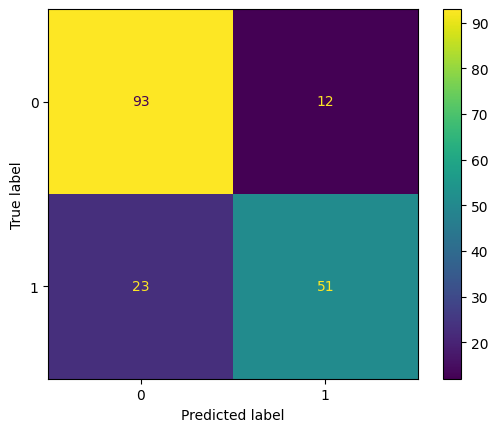

In [ ]:
cm = metrics.confusion_matrix(Y_test,y_pred, labels=clf.classes_)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
display.plot()